<a href="https://colab.research.google.com/github/Sushmitha-Katti/ERA/blob/main/Session%207%20-%20In-Depth%20Coding%20Practice/Drill2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code Drill 2
  * Target 
    * Fixed the Structure of Model. Going with the model where channels are increasing as we go futher. 
    * Introduced Dropout of 0.1
    * Introduced Max Pool after the Receptive Field: 5
  * Result
    * Parameters: 9,634
    * Epochs: 20
    * Best Training Accuracy: 98.80
    * Best Test Accuracy: 99.43
  * Analysis
   * Achieved the target accuracy in 19th epoch, howevers epochs and parameters constraint has not met. 
   * We have not applied any transformations yet, Still we got the better results.
   * Test Accuaracy is better than train accuracy. This means there is a scope to improve training. 

# Import Libraries

In [36]:
# To reload the disk files
%load_ext autoreload
%autoreload 2

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [37]:
# Train Phase transformations
train_transforms = transforms.Compose([

                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [38]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [39]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


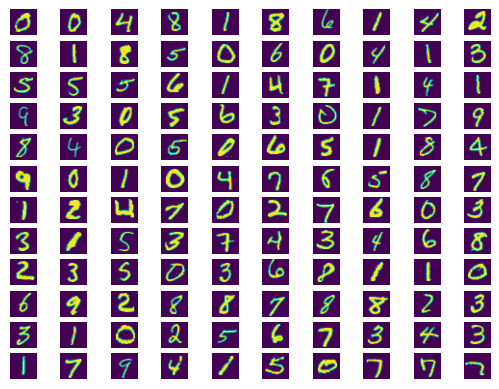

In [42]:
from utils import plot_images
images, labels = next(train_loader)
plot_images(120, images)

# Model Params


In [44]:
from models.model2 import Model2
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model2().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
         Dropout2d-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 12, 24, 24]           1,080
              ReLU-6           [-1, 12, 24, 24]               0
       BatchNorm2d-7           [-1, 12, 24, 24]              24
         Dropout2d-8           [-1, 12, 24, 24]               0
         MaxPool2d-9           [-1, 12, 12, 12]               0
           Conv2d-10           [-1, 14, 10, 10]           1,512
             ReLU-11           [-1, 14, 10, 10]               0
      BatchNorm2d-12           [-1, 14, 10, 10]              28

# Model Training and Testing

In [45]:

from train_test import TrainTest
train_test_instance = TrainTest()

model =  Model2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train_test_instance.train(model, device, train_loader, optimizer, epoch)
    train_test_instance.test(model, device, test_loader)

EPOCH: 1


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=0.1010931134223938 Batch_id=468 Accuracy=84.02: 100%|██████████| 469/469 [00:19<00:00, 24.37it/s]



Test set: Average loss: 0.0824, Accuracy: 9768/10000 (97.68%)

EPOCH: 2


Loss=0.05336379632353783 Batch_id=468 Accuracy=96.37: 100%|██████████| 469/469 [00:21<00:00, 21.91it/s]



Test set: Average loss: 0.0490, Accuracy: 9866/10000 (98.66%)

EPOCH: 3


Loss=0.05021626129746437 Batch_id=468 Accuracy=97.30: 100%|██████████| 469/469 [00:21<00:00, 21.63it/s]



Test set: Average loss: 0.0406, Accuracy: 9880/10000 (98.80%)

EPOCH: 4


Loss=0.04570603743195534 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:23<00:00, 20.17it/s]



Test set: Average loss: 0.0342, Accuracy: 9889/10000 (98.89%)

EPOCH: 5


Loss=0.026662254706025124 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:18<00:00, 24.69it/s]



Test set: Average loss: 0.0301, Accuracy: 9903/10000 (99.03%)

EPOCH: 6


Loss=0.09205273538827896 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:19<00:00, 24.12it/s]



Test set: Average loss: 0.0283, Accuracy: 9914/10000 (99.14%)

EPOCH: 7


Loss=0.016053002327680588 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:21<00:00, 21.40it/s]



Test set: Average loss: 0.0260, Accuracy: 9916/10000 (99.16%)

EPOCH: 8


Loss=0.034470658749341965 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:21<00:00, 22.28it/s]



Test set: Average loss: 0.0245, Accuracy: 9925/10000 (99.25%)

EPOCH: 9


Loss=0.09786815196275711 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:19<00:00, 24.55it/s]



Test set: Average loss: 0.0231, Accuracy: 9922/10000 (99.22%)

EPOCH: 10


Loss=0.007642339915037155 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:19<00:00, 24.63it/s]



Test set: Average loss: 0.0286, Accuracy: 9914/10000 (99.14%)

EPOCH: 11


Loss=0.022592253983020782 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:19<00:00, 24.43it/s]



Test set: Average loss: 0.0207, Accuracy: 9931/10000 (99.31%)

EPOCH: 12


Loss=0.027660511434078217 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:20<00:00, 23.04it/s]



Test set: Average loss: 0.0220, Accuracy: 9929/10000 (99.29%)

EPOCH: 13


Loss=0.057995107024908066 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:20<00:00, 23.41it/s]



Test set: Average loss: 0.0226, Accuracy: 9928/10000 (99.28%)

EPOCH: 14


Loss=0.06233027204871178 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:21<00:00, 21.80it/s]



Test set: Average loss: 0.0196, Accuracy: 9938/10000 (99.38%)

EPOCH: 15


Loss=0.012943308800458908 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:17<00:00, 27.20it/s]



Test set: Average loss: 0.0197, Accuracy: 9939/10000 (99.39%)

EPOCH: 16


Loss=0.08458724617958069 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:17<00:00, 27.46it/s]



Test set: Average loss: 0.0228, Accuracy: 9929/10000 (99.29%)

EPOCH: 17


Loss=0.015067358501255512 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:17<00:00, 27.31it/s]



Test set: Average loss: 0.0198, Accuracy: 9935/10000 (99.35%)

EPOCH: 18


Loss=0.04966893419623375 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:17<00:00, 27.26it/s]



Test set: Average loss: 0.0198, Accuracy: 9935/10000 (99.35%)

EPOCH: 19


Loss=0.038966622203588486 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:17<00:00, 27.24it/s]



Test set: Average loss: 0.0183, Accuracy: 9943/10000 (99.43%)

EPOCH: 20


Loss=0.022351102903485298 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:17<00:00, 27.11it/s]



Test set: Average loss: 0.0181, Accuracy: 9939/10000 (99.39%)



# Loss and Accuaracy

Text(0.5, 1.0, 'Test Accuracy')

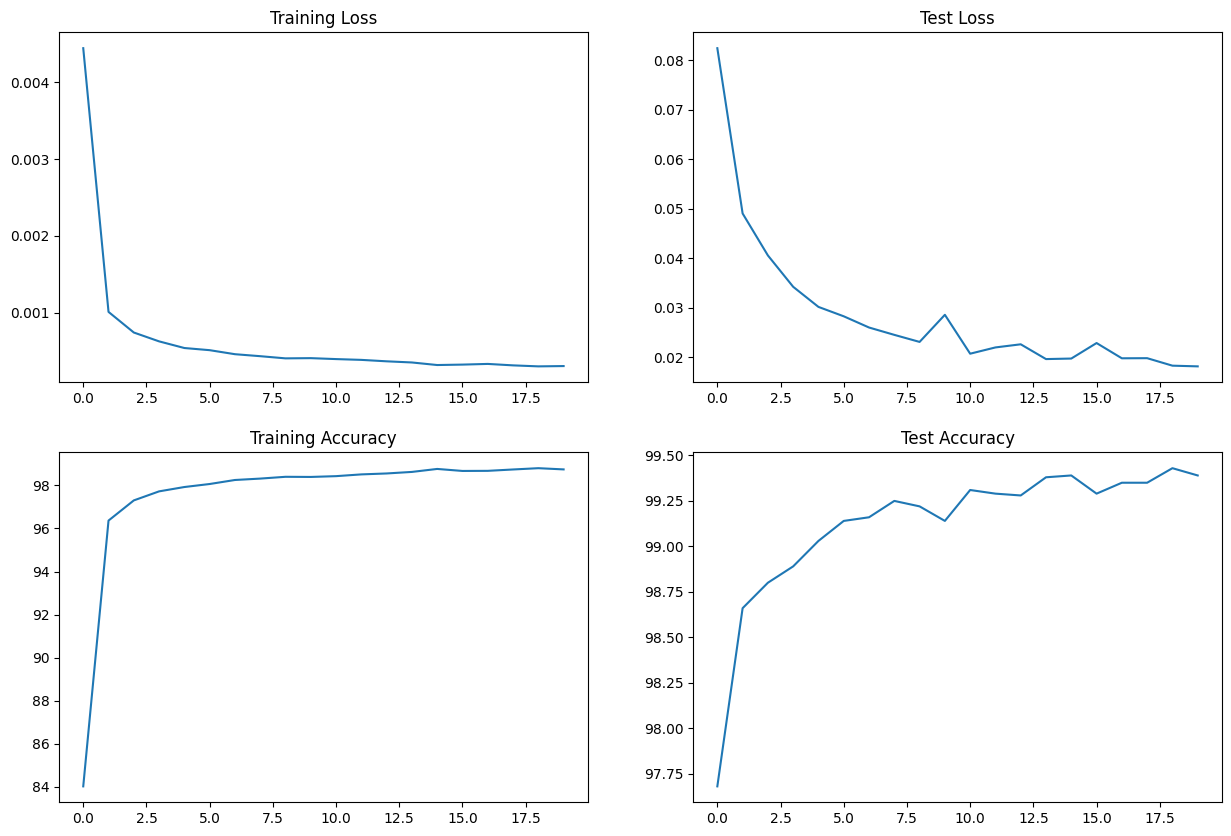

In [46]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_test_instance.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_test_instance.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(train_test_instance.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(train_test_instance.test_acc)
axs[1, 1].set_title("Test Accuracy")